[View in Colaboratory](https://colab.research.google.com/github/ankitpyc/Autopy/blob/master/mobile_price_classification.ipynb)

# Confirm TensorFlow can see the GPU

Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

In [0]:
import pandas as pd
import warnings
from sklearn.metrics import matthews_corrcoef,accuracy_score
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
np.random.seed(2)
import pickle
from sklearn.externals import joblib
Submission_dir  = "Evaluation_Models/"

In [3]:
from google.colab import files

uploaded = files.upload() 

ids = pd.read_csv('test.csv')['id']
test_features = pd.read_csv('test.csv')
test_features = test_features.drop(['id'],1)

Saving test.csv to test.csv
Saving train.csv to train.csv


In [4]:
data = pd.read_csv('train.csv')
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
print "total no of features are {}".format(len(data.columns))

total no of features are 21


In [7]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [11]:
print "The train data statistics are :","\n"
print "="*100
# Now Lets analyze how much data is missing from the data (counting the no of NAN)
data.info()
sns.set_style('whitegrid')

The train data statistics are : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [10]:
print "The test data statistics are :","\n"
print "="*100
# Now Lets analyze how much data is missing from the data (counting the no of NAN)
test_features.info()
sns.set_style('whitegrid')

The test data statistics are : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
battery_power    1000 non-null int64
blue             1000 non-null int64
clock_speed      1000 non-null float64
dual_sim         1000 non-null int64
fc               1000 non-null int64
four_g           1000 non-null int64
int_memory       1000 non-null int64
m_dep            1000 non-null float64
mobile_wt        1000 non-null int64
n_cores          1000 non-null int64
pc               1000 non-null int64
px_height        1000 non-null int64
px_width         1000 non-null int64
ram              1000 non-null int64
sc_h             1000 non-null int64
sc_w             1000 non-null int64
talk_time        1000 non-null int64
three_g          1000 non-null int64
touch_screen     1000 non-null int64
wifi             1000 non-null int64
dtypes: float64(2), int64(18)
memory usage: 156.3 KB


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


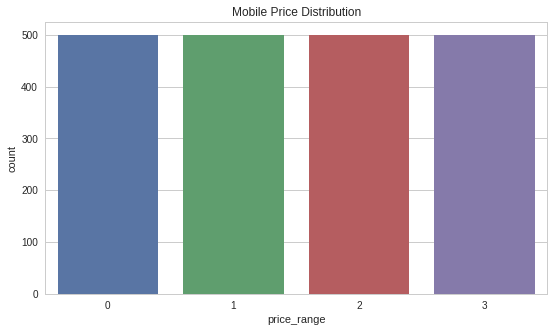

In [12]:
fig = plt.figure(figsize=(9,5))
plt.title('Mobile Price Distribution')
sns.countplot(data['price_range'])


In [0]:
price_ranges = data['price_range']
data_train = data.drop('price_range',1)

In [0]:
# Data Analysis 

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


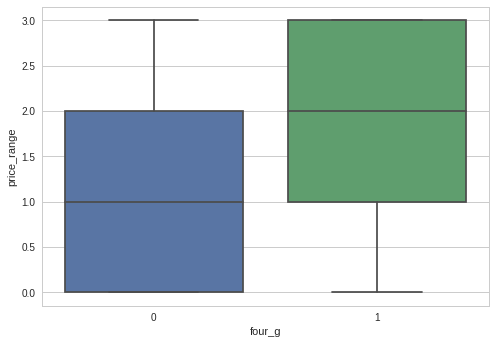

In [16]:
sns.boxplot(x=data['four_g'],y=data['price_range'])

## **Feature Selection and corelation**

---



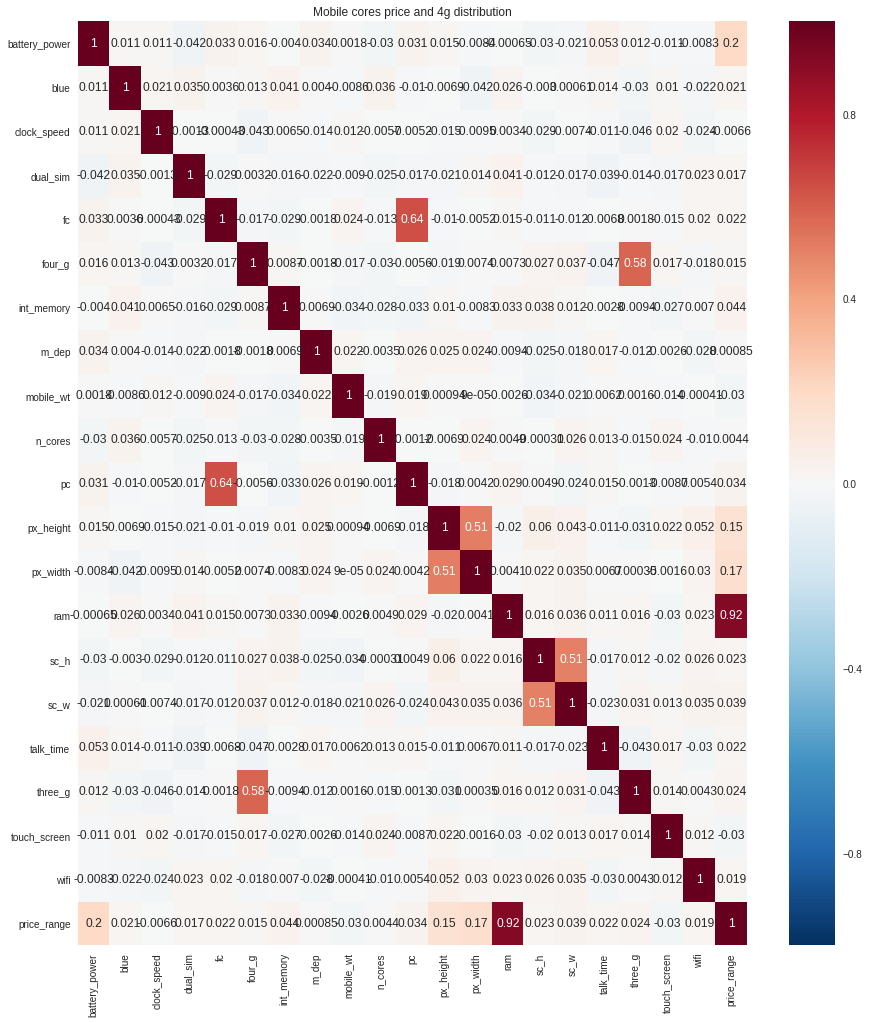

In [17]:
fig = plt.figure(figsize=(15,17))
plt.title('Mobile cores price and 4g distribution')
sns.heatmap(data.corr(), annot=True)

### * it seems like only battery power,ram,px_height & px_width are useful in predicting the price range *

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


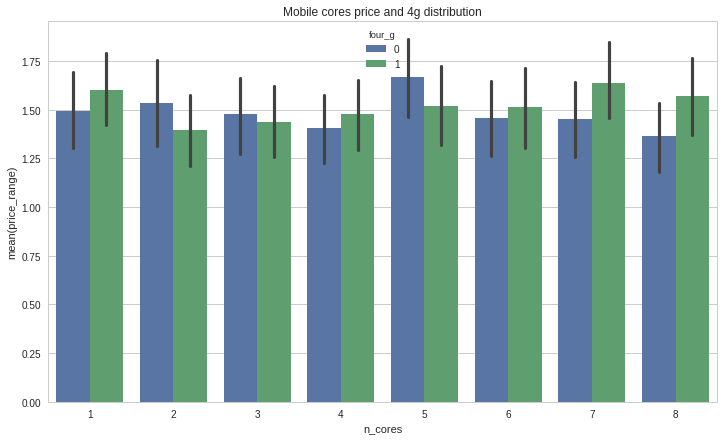

In [18]:
fig = plt.figure(figsize=(12,7))
plt.title('Mobile cores price and 4g distribution')
sns.barplot(hue = data['four_g'],x=data['n_cores'], y=data['price_range']);

# Now lets use random forest for feature importance 

('Accuracy is: ', 0.88)


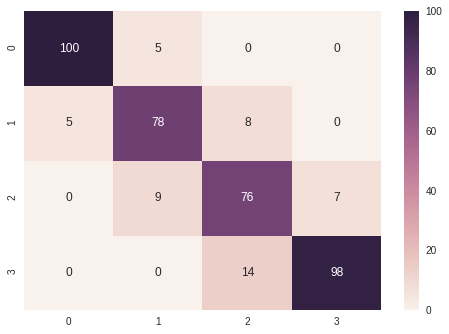

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(data_train,price_ranges, test_size=0.20, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43,min_samples_leaf=1,n_estimators=500)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

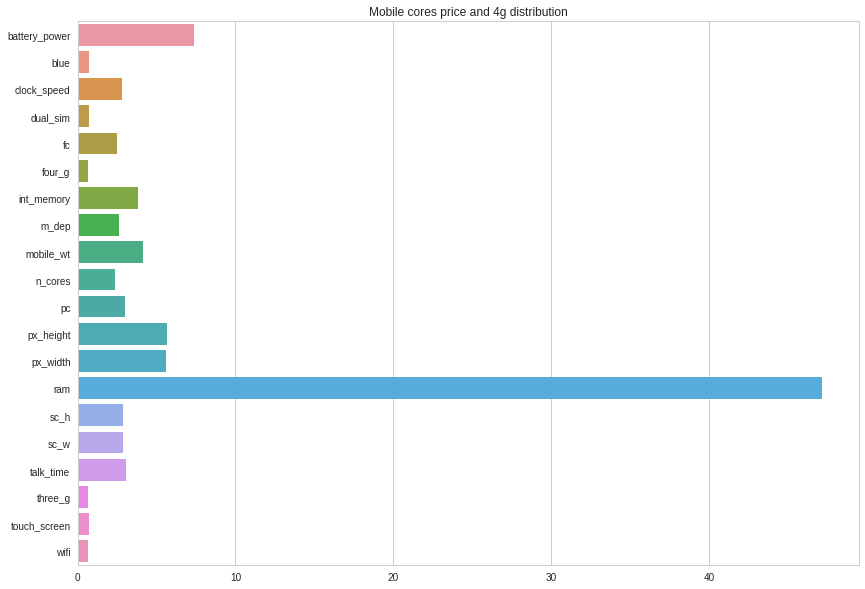

In [24]:
z = clf_rf.feature_importances_
fig = plt.figure(figsize=(14,10))
plt.title('Mobile cores price and 4g distribution')
sns.barplot(y = data_train.columns,x=z*100)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_train,price_ranges, test_size=0.20, random_state=42)

In [0]:
# Normalizing the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(data_train)
print "Now the standard deviation and mean for the whole dataset is :\n"
print "mean : ", x.mean()
print "standard_deviation : ",x.std()

Now the standard deviation and mean for the whole dataset is :

mean :  1.84297022087776e-17
standard_deviation :  1.0


In [0]:
# A utility function that writes test files for us
def write_test_file(name,model):
    preds = model.predict(scaler.transform(test_features))
    Crimina = pd.DataFrame(preds,columns=['price_range'])
    result = pd.concat([ids,Crimina],axis=1)
    result.to_csv(name+".csv",index=False)
    from google.colab import files
    files.download(name+".csv") 


# K Nearest Neigbour


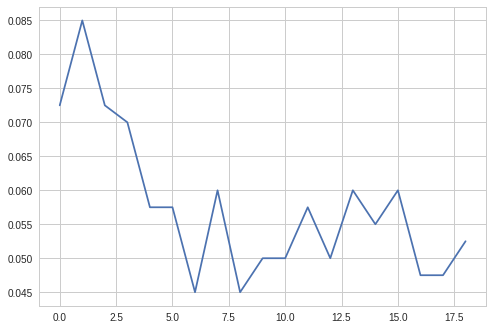

In [29]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.plot(error_rate)    

In [0]:
# KNN turns out no of neigbours as 14 has the lowest error rate

In [0]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x,price_ranges)
write_test_file('knn',knn)

## Support Vector Machine

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import  SVC
model = SVC()
SVm_model = GridSearchCV(model,param_grid = {'C': [1,50,100,150,200,500,600]},verbose=3,cv=10,return_train_score = True)
print "Training model : SVM Sip a coffe till then ...\n" 
SVm_model.fit(x,price_ranges)
print("Mean_cv_train_score",SVm_model.cv_results_["mean_train_score"].mean())
print("Mean_cv_test_score",SVm_model.cv_results_["mean_test_score"].mean())
write_test_file('SVM',SVm_model)

Training model : SVM Sip a coffe till then ...

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] C=1 .............................................................
[CV] .................................. C=1, score=0.89, total=   0.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................................... C=1, score=0.9, total=   0.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ................................. C=1, score=0.845, total=   0.2s
[CV] C=1 .............................................................
[CV] .................................. C=1, score=0.86, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.945, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.905, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.875, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.845, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.875, total=   0.2s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   23.0s finished


('Mean_cv_train_score', 0.9979365079365079)
('Mean_cv_test_score', 0.8857857142857142)
